### GT check
- First, lets check out the total length and configurations of GT dataset

In [57]:
""" import core extractor module """
import sys
sys.path.append("/home/woongjib/Projects/SBR/aac_analysis")
from utils import profile_decoding_output

from utility import get_audio_paths, draw_spec
import librosa
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Audio, display

In [58]:
### GT data
gt_path = "/home/woongjib/Projects/Dataset_Crop/Splits/GT/"
paths = get_audio_paths(gt_path)
print(f"Total data samples: {len(paths)}")

### SBR data samples
sbr_path = "/home/woongjib/Projects/Dataset_Crop/Splits/SBR_12_Core/"
sbr_paths = get_audio_paths(sbr_path, file_extensions=['.wav'])
print(f"Total data samples: {len(sbr_paths)}")

### Core data samples
core_path = "/home/woongjib/Projects/Dataset_Crop/Splits/SBR_20_Core"
core_paths = get_audio_paths(core_path, file_extensions=['.wav'])
print(f"Total data samples: {len(core_paths)}")

print(209759 / 3600)
print(131291 / 3600)
print(68249 / 3600)
print(409299 / 3600)

Total data samples: 409299
Total data samples: 409299
Total data samples: 409299
58.26638888888889
36.469722222222224
18.958055555555557
113.69416666666666


/home/woongjib/Projects/Dataset_Crop/Splits/SBR_20_Core/FSD50K/FSD50K.dev_audio/100300_mono_5.wav
(48000,)
(48000,)


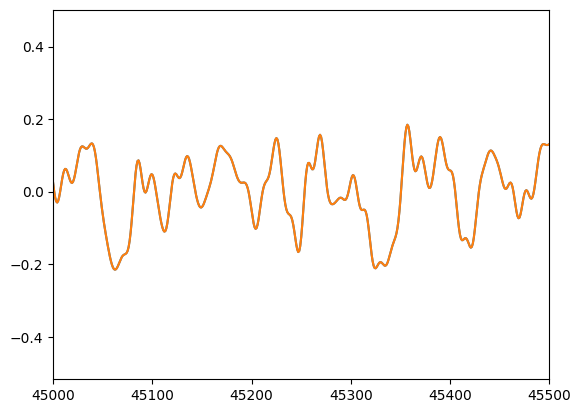

In [59]:
### Check alignment
gt_paths = [f.replace("SBR_12_Core","GT") for f in core_paths]

idx = 360
print(gt_paths[idx])
y,sr = librosa.load(gt_paths[idx], sr=None)
y2, sr = librosa.load(core_paths[idx], sr=None)

print(y.shape)  
print(y2.shape)

plt.plot(y)
plt.plot(y2)
plt.xlim(45000,45000+500)
plt.show()


/home/woongjib/Projects/Dataset_Crop/Splits/GT/FSD50K/FSD50K.dev_audio/10000_mono_1.wav
48000 0


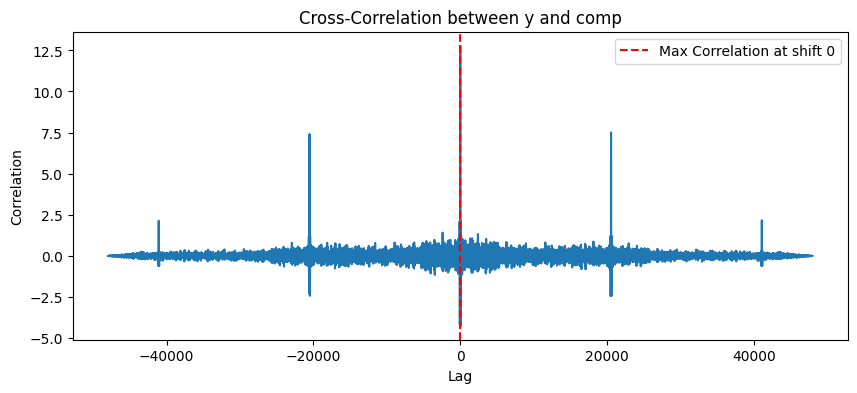

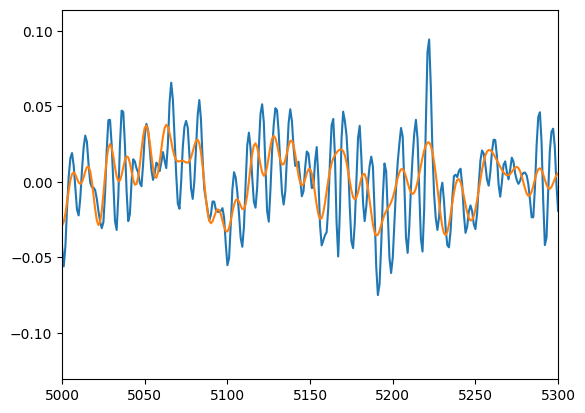

In [64]:
def find_optimal_shift(y, comp):
    correlation = np.correlate(y, comp, mode='full')
    max_corr_index = np.argmax(correlation)
    shift = max_corr_index - (len(comp) - 1)
    
    plt.figure(figsize=(10, 4))
    lags = np.arange(-len(comp) + 1, len(y))
    plt.plot(lags, correlation)
    plt.title('Cross-Correlation between y and comp')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.axvline(x=shift, color='r', linestyle='--', label=f'Max Correlation at shift {shift}')
    plt.legend()
    # plt.xlim(-100,100)
    plt.show()
    
    return shift

for idx in [3,]:
    sample = paths[idx]
    print(sample)

    y, sr = librosa.load(sample, sr=None)
    comp, _ = librosa.load(core_paths[idx], sr=None)
    gt_len = len(y) # 19166 length
    comp_len = len(comp)
    print(comp_len, gt_len - comp_len)
    
    shift = find_optimal_shift(y, comp)
    # print(shift)
    # y = y[1:]
    plt.plot(y)
    plt.plot(comp)
    start = 5000
    plt.xlim(start, start+300)
    plt.show()

### Extract cores

In [ ]:
""" Single file decoding """
# import soundfile
# gt_path = "/home/woongjib/Projects/Dataset_Crop/GT/FSD50K/FSD50K.dev_audio/100007_mono.m4a"
# sbr_path = "/home/woongjib/Projects/Dataset_Crop/SBR_12/FSD50K/FSD50K.dev_audio/100007_mono.m4a"

# import os
# orig_dir = os.getcwd()
# os.chdir("/home/woongjib/Projects/SBR/aac_analysis")
# try:
#     outdict = profile_decoding_output(sbr_path)
#     core = outdict['core'] / 32768
#     plt.plot(core)
#     plt.show()
#     print(len(core))
#     # soundfile.write("temp.wav", core, samplerate=48000)
    
# finally:
#     os.chdir(orig_dir)

95871 97214 98176
748.9921875 759.484375 767.0


/tmp/ipykernel_550809/3437181765.py:20: UserWarning: PySoundFile failed. Trying audioread instead.
  comp,sr = librosa.load(path, sr=None)
/home/woongjib/anaconda3/envs/env2/lib/python3.12/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


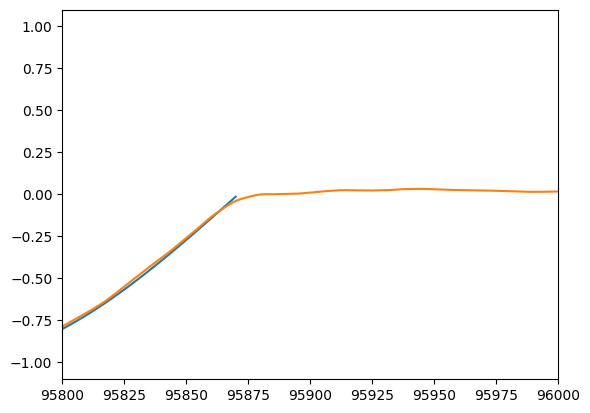

In [21]:
""" Sine wave and alignment comparison """
# import soundfile as sf
# import torchaudio

# ### Construct each file and compare lengths

# """
# ffmpeg -i /home/woongjib/Projects/BESSL_preprocess/temp/wav1.wav -codec:a libfdk_aac -profile:a aac_he -ac 1 -b:a 12k /home/woongjib/Projects/BESSL_preprocess/temp/wav1_c.m4a
# ffmpeg -i 5khz_sine.wav -codec:a libfdk_aac -profile:a aac_he -ac 1 -b:a 12k sine_c.m4a
# """

# path = f"/home/woongjib/Projects/BESSL_preprocess/temp/100hz.wav"
# gt,sr = librosa.load(path, sr=None)
# # plt.plot(gt)
# # plt.show()
# # draw_spec(gt,sr=sr)
# # display(Audio(gt, rate=sr))

# path = f"/home/woongjib/Projects/BESSL_preprocess/temp/sine_100.m4a"
# comp,sr = librosa.load(path, sr=None)
# # plt.plot(comp)
# # plt.show()
# # draw_spec(comp,sr=sr)
# # display(Audio(comp, rate=sr))

# ### decodec
# path = f"/home/woongjib/Projects/BESSL_preprocess/temp/100_decode.wav"
# decode,sr = librosa.load(path, sr=None)
# # plt.plot(comp)
# # plt.show()
# # draw_spec(comp,sr=sr)
# # display(Audio(comp, rate=sr))

# gt = gt[1:]
# # shift = find_optimal_shift(gt, comp)
# # print(shift)

# gt = gt[128:]
# comp = comp[128:]
# print(
#       len(gt), 
#       len(comp), 
#       len(decode)
#       )
# print(len(gt)/128, len(comp)/128, len(decode)/128)

# plt.plot(gt)
# plt.plot(comp)
# # plt.plot(decode)
# start = 24900
# start = 95800
# plt.xlim(start, start+200)
# plt.show()


### Decode SBR and extract core